# Exercise 2 Notebook
After reading Chapter [3](03_modelling.ipynb) and understanding the given examples, you can try solving the below exercises. Steps to solution are given to facilitate how you go through the problems. However, feel free to use your own logic and go through the problems yourself if you want to.

## **Exercise 2.1 — Linear fitting**
<br>
This exercise extends Exercise 1.2 from the Mathematics primer. It is helpful to complete the
Math exercise first.
In the file ’meteo82d.dat’ we can find the average wind speed for the given time periods in
column 15.
Read this data and create a normalized wind speed distribution (bins 0-1, 1-2 ,…m/s). This
distribution is commonly modelled with the Weibull-distribution:
$$ f(u) = \frac{k}{A} \cdot (\frac{u}{A})^{k-1} \cdot e^{{-(\frac{u}{A})^k}}$$
The result of Exercise 1.2 from the Mathematics primer is a linear function with which it
should be possible to find the two Weibull parameters A and k via a linear fit.
Perform the necessary calculations and using a linear fit determine the Weibull parameters.
Finally plot your modelled Weibull distribution with the measurement data to get an idea
about the fit quality
HINT: It becomes necessary to assign a numerical value to a bin. It is reasonable use its
center value, e.g: bin 1-2  1.5

In [1]:
import pandas as pd

In [105]:
import matplotlib.pyplot as plt
import numpy as np

In [78]:
import scipy.optimize as scipy_opt

In [3]:
meteo82 = pd.read_csv('meteo82d.dat', delimiter = '\t', header = None)

In [4]:
u_avg = meteo82.iloc[:,14]

In [5]:
np.min(u_avg)

0.0

In [6]:
#u_avg = np.concatenate((np.repeat(1,1), np.repeat(2,2), th,fr, np.repeat(5,9), np.repeat(6,11), np.repeat(7,11), np.repeat(8,11), np.repeat(9,9), np.repeat(10,8), np.repeat(11,6), np.repeat(12,6), np.repeat(13,5), np.repeat(14,3), np.repeat(15,2), np.repeat(16,2), np.repeat(17,1), np.repeat(18,1)))

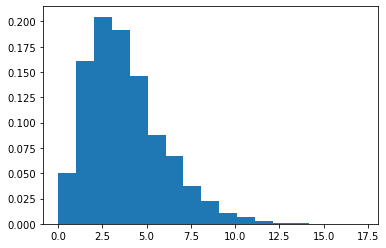

In [96]:
hyn, hxn, hpn = plt.hist(u_avg, bins=17, density=True)

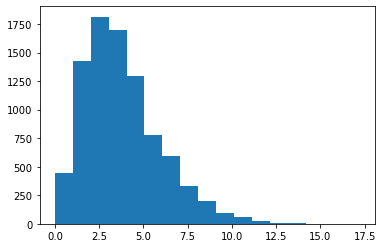

In [97]:
hy, hx, hp = plt.hist(u_avg, bins=17)

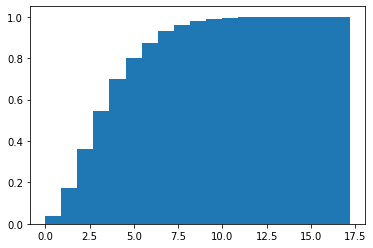

In [8]:
cx, cb, cp = plt.hist(u_avg, bins=19, density = True, cumulative=True)

In [83]:
hx

array([ 0.        ,  1.01176471,  2.02352941,  3.03529412,  4.04705882,
        5.05882353,  6.07058824,  7.08235294,  8.09411765,  9.10588235,
       10.11764706, 11.12941176, 12.14117647, 13.15294118, 14.16470588,
       15.17647059, 16.18823529, 17.2       ])

In [99]:
midhx = (hx[1:] + hx[:-1]) / 2
midhxn = (hx[1:] + hx[:-1]) / 2

In [85]:
hy

array([5.05468833e-02, 1.60554051e-01, 2.04669746e-01, 1.91356058e-01,
       1.45773601e-01, 8.75544229e-02, 6.70197515e-02, 3.70075396e-02,
       2.29040565e-02, 1.02673357e-02, 6.31836041e-03, 2.59504088e-03,
       9.02622916e-04, 4.51311458e-04, 1.12827865e-04, 2.25655729e-04,
       1.12827865e-04])

(array([5.05468833e-02, 1.60554051e-01, 2.04669746e-01, 1.91356058e-01,
        1.45773601e-01, 8.75544229e-02, 6.70197515e-02, 3.70075396e-02,
        2.29040565e-02, 1.02673357e-02, 6.31836041e-03, 2.59504088e-03,
        9.02622916e-04, 4.51311458e-04, 1.12827865e-04, 2.25655729e-04,
        1.12827865e-04]),
 array([ 0.        ,  1.01176471,  2.02352941,  3.03529412,  4.04705882,
         5.05882353,  6.07058824,  7.08235294,  8.09411765,  9.10588235,
        10.11764706, 11.12941176, 12.14117647, 13.15294118, 14.16470588,
        15.17647059, 16.18823529, 17.2       ]),
 <a list of 17 Patch objects>)

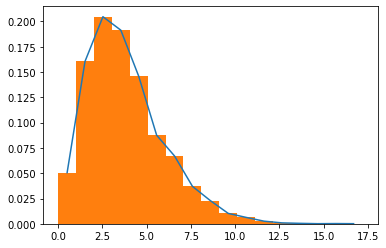

In [100]:
#y = np.log(np.log(1/(1 - hx[1:18])))
u = np.linspace(1,17.2,17)
#x = np.log(u)
plt.plot(midhxn, hyn)
plt.hist(u_avg, bins=17, density=True)

In [89]:
print(midhx)

[ 0.50588235  1.51764706  2.52941176  3.54117647  4.55294118  5.56470588
  6.57647059  7.58823529  8.6         9.61176471 10.62352941 11.63529412
 12.64705882 13.65882353 14.67058824 15.68235294 16.69411765]


In [90]:
print(hy)

[5.05468833e-02 1.60554051e-01 2.04669746e-01 1.91356058e-01
 1.45773601e-01 8.75544229e-02 6.70197515e-02 3.70075396e-02
 2.29040565e-02 1.02673357e-02 6.31836041e-03 2.59504088e-03
 9.02622916e-04 4.51311458e-04 1.12827865e-04 2.25655729e-04
 1.12827865e-04]


[1.92630426 4.13531315]


(array([5.05468833e-02, 1.60554051e-01, 2.04669746e-01, 1.91356058e-01,
        1.45773601e-01, 8.75544229e-02, 6.70197515e-02, 3.70075396e-02,
        2.29040565e-02, 1.02673357e-02, 6.31836041e-03, 2.59504088e-03,
        9.02622916e-04, 4.51311458e-04, 1.12827865e-04, 2.25655729e-04,
        1.12827865e-04]),
 array([ 0.        ,  1.01176471,  2.02352941,  3.03529412,  4.04705882,
         5.05882353,  6.07058824,  7.08235294,  8.09411765,  9.10588235,
        10.11764706, 11.12941176, 12.14117647, 13.15294118, 14.16470588,
        15.17647059, 16.18823529, 17.2       ]),
 <a list of 17 Patch objects>)

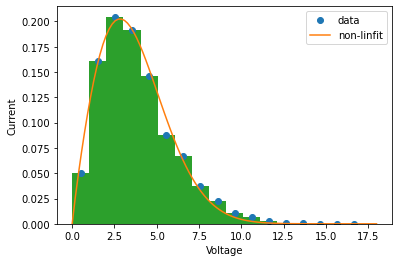

In [104]:
def windfunc(x, k, A):
    return (k/A)*((x/A)**(k-1))*np.exp(-(x/A)**k)

popt, pcov = scipy_opt.curve_fit(windfunc, midhxn, hyn, p0 = np.array([2,5])) 
print(popt)
xi = np.linspace(0,18,100) #x-axis points at which to evaluate polynomial for graph
fit_y= windfunc(xi, popt[0], popt[1]) #Takes coefficients and calculates values at specified points

#Show results as figure
fig, ax = plt.subplots()
ax.plot(midhxn, hyn, "o", xi, fit_y, "-") 
plt.legend(["data", "non-linfit"], loc="best")
ax.set(xlabel="Voltage", ylabel="Current")
#ax.set(xlim=(0, 22.05), ylim=(-0.5, 4))
plt.hist(u_avg, bins=17, density=True)

In [13]:
n = 1 #Degree of polynomial

p = np.polyfit(x, y, n) 
print(p)

Ti = np.linspace(, 3.5, 100)
fit_y = np.polyval(p, Ti) #Takes coefficients and calculates values at specified points

#Show results as figure 
fig, ax = plt.subplots() 
ax.plot(x, y, "o", Ti, fit_y, "-") 
plt.legend(["data", "polyfit"], loc="best")

NameError: name 'x' is not defined

In [ ]:
k = p[0]
A = float(np.exp(-p[1]/[p[0]]))

In [ ]:
k

In [ ]:
A

In [ ]:
f = (k/A)*((u/A)**(k-1))*np.exp(-(u/A)**k)

In [ ]:
f

In [ ]:
plt.plot(u,f)
plt.hist(u_avg, bins=18, density=True)